In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [2]:
# Load dataset
df = pd.read_csv("D:/train.csv")
df = df[['Age', 'MonthlyIncome']].dropna()
print("Dataset loaded successfully.")
print("Total rows after cleaning:", len(df))
print(df.head())

Dataset loaded successfully.
Total rows after cleaning: 1058
   Age  MonthlyIncome
0   41           5993
1   49           5130
2   37           2090
3   33           2909
4   27           3468


In [ ]:
# Handling Null Values
df.isnull().sum()

Age              0
MonthlyIncome    0
dtype: int64

In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
               Age  MonthlyIncome
count  1058.000000    1058.000000
mean     37.055766    6625.945180
std       9.410421    4837.695042
min      18.000000    1009.000000
25%      30.000000    2900.250000
50%      36.000000    4903.500000
75%      43.000000    8736.500000
max      60.000000   19999.000000


In [5]:
# Pearson Correlation
print("Running Pearson Correlation...")
r_value, p_value = stats.pearsonr(df['Age'], df['MonthlyIncome'])
print("Pearson r:", round(r_value, 4))
print("p-value:", p_value)


if p_value < 0.05:
    print("Conclusion: p < 0.05 → Statistically Significant")
    print("We REJECT the Null Hypothesis.")
else:
    print("Conclusion: p >= 0.05 → Not Significant")
    print("We FAIL TO REJECT the Null Hypothesis.")

Running Pearson Correlation...
Pearson r: 0.4974
p-value: 3.298395145050374e-67
Conclusion: p < 0.05 → Statistically Significant
We REJECT the Null Hypothesis.


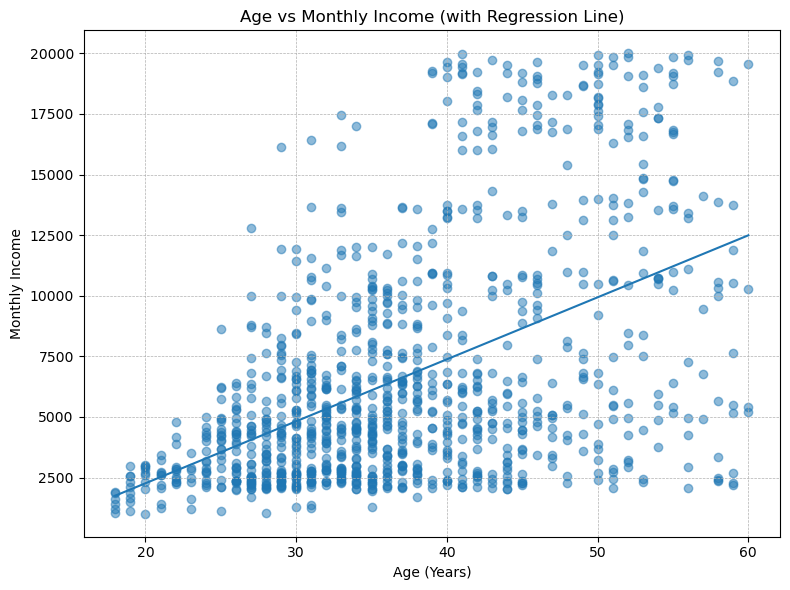

In [6]:
# Linear Regression for Scatter Plot
slope, intercept = np.polyfit(df['Age'], df['MonthlyIncome'], 1)
x_vals = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y_vals = slope * x_vals + intercept


plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['MonthlyIncome'], alpha=0.5)
plt.plot(x_vals, y_vals)
plt.title("Age vs Monthly Income (with Regression Line)")
plt.xlabel("Age (Years)")
plt.ylabel("Monthly Income")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

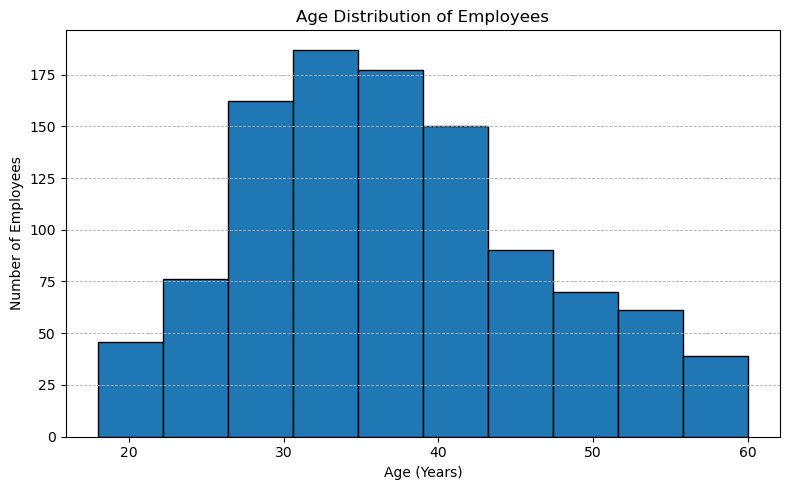

In [7]:
# Histogram: Age
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title("Age Distribution of Employees")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Employees")
plt.grid(axis='y', linestyle='--', linewidth=0.6)
plt.tight_layout()
plt.show()

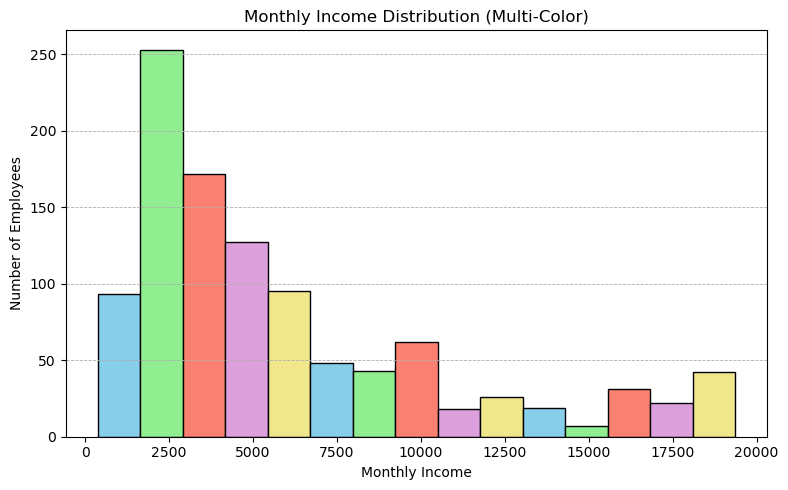

In [9]:
# Histogram: Monthly Income
counts, bins = np.histogram(df['MonthlyIncome'], bins=15)
colors = ['skyblue', 'lightgreen', 'salmon', 'plum', 'khaki']


plt.figure(figsize=(8,5))
for i in range(len(counts)):
    plt.bar(bins[i], counts[i], width=bins[i+1] - bins[i], color=colors[i % len(colors)], edgecolor='black')


plt.title("Monthly Income Distribution (Multi-Color)")
plt.xlabel("Monthly Income")
plt.ylabel("Number of Employees")
plt.grid(axis='y', linestyle='--', linewidth=0.6)
plt.tight_layout()
plt.show()